In [1]:
# astar_example1.py

from numpy import array
from pybimstab.astar import PreferredPath, Astar
grid = array([[0,  0,  0,  0,  1,  0,  0,  0,  0,  0],
              [0,  0,  0,  0,  1,  1,  0,  0,  0,  0],
              [0,  0,  0,  1,  1,  0,  1,  0,  1,  0],
              [0,  1,  1,  0,  0,  0,  0,  1,  0,  0],
              [0,  0,  0,  1,  0,  0,  0,  1,  1,  1],
              [0,  0,  1,  0,  1,  1,  0,  0,  0,  0],
              [0,  0,  1,  0,  1,  0,  1,  0,  0,  0],
              [1,  1,  0,  1,  0,  0,  0,  0,  1,  1],
              [1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
              [0,  0,  0,  0,  1,  0,  1,  0,  0,  1],
              [0,  1,  0,  0,  0,  1,  0,  0,  0,  0],
              [1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
              [0,  0,  0,  0,  0,  0,  0,  0,  1,  0],
              [1,  0,  0,  0,  1,  0,  0,  0,  0,  0]
              ])
coordsIdx = array(
    [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 13, 13, 13,
      13, 13, 13, 13, 13, 13, 13],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 4,
      5, 6, 7, 8, 9]])
preferredPath = PreferredPath(coordsIdx, factor=1)
for typePP in [None, preferredPath]:
    astar = Astar(grid, startNode=(0, 0), goalNode=(13, 9),
                  heuristic='manhattan', reverseLeft=True,
                  reverseUp=True, preferredPath=typePP)
    fig = astar.plot(plotPreferredPath=True)


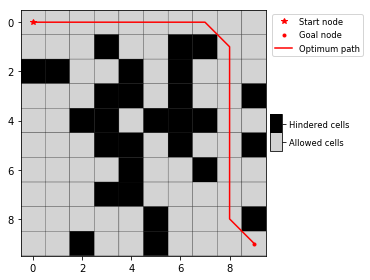

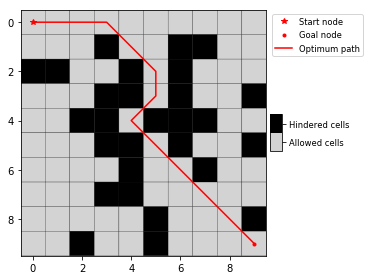

In [2]:
# astar_example2.py

from numpy import array
from pybimstab.astar import Astar
grid = array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 1, 0, 0, 1, 1, 0, 0],
              [1, 1, 0, 0, 1, 0, 1, 0, 0, 0],
              [0, 0, 0, 1, 1, 0, 1, 0, 0, 1],
              [0, 0, 1, 1, 0, 1, 1, 1, 0, 0],
              [0, 0, 0, 1, 1, 0, 1, 0, 0, 1],
              [0, 0, 0, 0, 1, 0, 0, 1, 0, 0],
              [0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
              [0, 0, 1, 0, 0, 1, 0, 0, 0, 0]])
for heuristic in ['manhattan', 'euclidean']:
    astar = Astar(grid, startNode=(0, 0), goalNode=(9, 9),
                  heuristic=heuristic, reverseLeft=True,
                  reverseUp=True, preferredPath=None)
    fig = astar.plot()


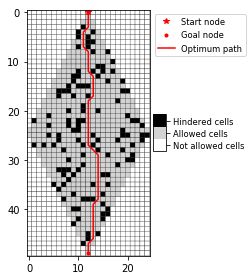

In [3]:
# astar_example3.py

from numpy import array
from pybimstab.bim import BlocksInMatrix
from pybimstab.astar import Astar
seed = 111  # for repeatibilty
boundary = array([[-5, 0, 5, 0, -5], [0, 10, 0, -10, 0]])
bim = BlocksInMatrix(slopeCoords=boundary, blockProp=0.2,
                     tileSize=0.4, seed=seed)
astar = Astar(bim.grid, startNode=(0, 12), goalNode=(49, 12),
              heuristic='manhattan', reverseLeft=True,
              reverseUp=True, preferredPath=None)
fig = astar.plot()


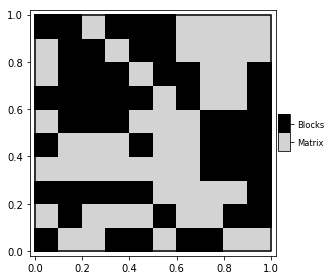

In [4]:
# bim_example1.py

from numpy import array
from pybimstab.bim import BlocksInMatrix
slopeCoords = array([[0, 1, 1, 0, 0], [0, 0, 1, 1, 0]])
bim = BlocksInMatrix(slopeCoords=slopeCoords, blockProp=0.5,
                     tileSize=0.1, seed=123)
fig = bim.plot()


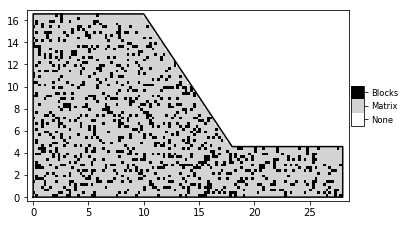

In [5]:
# bim_example2.py

from pybimstab.slope import AnthropicSlope
from pybimstab.bim import BlocksInMatrix
slope = AnthropicSlope(slopeHeight=12, slopeDip=[1, 1.5],
                       crownDist=10, toeDist=10)
bim = BlocksInMatrix(slopeCoords=slope.coords, blockProp=0.2,
                     tileSize=0.25, seed=123)
fig = bim.plot()


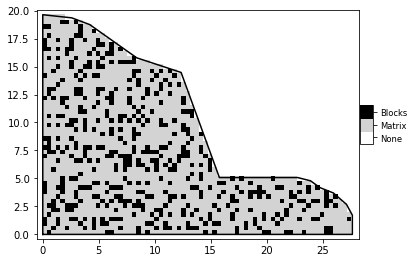

In [6]:
# bim_example3.py

from numpy import array
from pybimstab.slope import NaturalSlope
from pybimstab.bim import BlocksInMatrix
terrainCoords = array(
    [[-2.49, 0.1, 1.7, 3.89, 5.9, 8.12, 9.87, 13.29, 20.29,
      21.43, 22.28, 23.48, 24.65, 25.17],
     [18.16, 17.88, 17.28, 15.73, 14.31, 13.58, 13, 3.61, 3.61,
      3.32, 2.71, 2.23, 1.21, 0.25]])
slope = NaturalSlope(terrainCoords)
bim = BlocksInMatrix(slopeCoords=slope.coords, blockProp=0.25,
                     tileSize=0.4, seed=123)
fig = bim.plot()


array([False], dtype=bool)

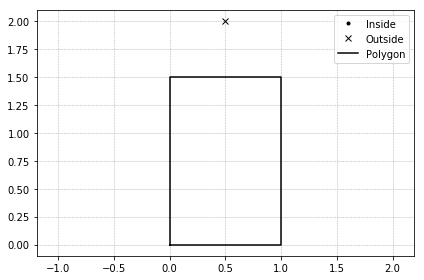

In [7]:
# polygon_example1.py

from numpy import array
from pybimstab.polygon import Polygon
coords = array([[0, 1, 1, 0], [0, 0, 1.5, 1.5]])
x, y = 0.5, 2
polygon = Polygon(coordinates=coords)
polygon.isinside(x=x, y=y, meshgrid=False, want2plot=True)


array([ True,  True,  True, False, False], dtype=bool)

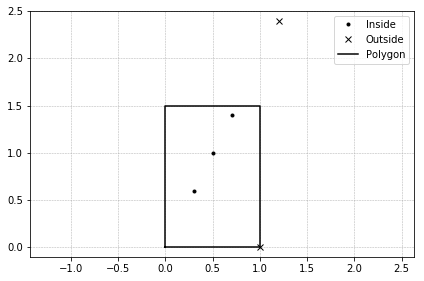

In [8]:
# polygon_example2.py

from numpy import array
from pybimstab.polygon import Polygon
coords = array([[0, 1, 1, 0.], [0, 0, 1.5, 1.5]])
x = array([0.3, 0.5, 0.7, 1.2, 1.0])
y = array([0.6, 1., 1.4, 2.4, 0])
polygon = Polygon(coordinates=coords)
polygon.isinside(x=x, y=y, meshgrid=False, want2plot=True)


array([[ True,  True,  True, False,  True],
       [ True,  True,  True, False,  True],
       [ True,  True,  True, False,  True],
       [False, False, False, False, False],
       [False, False, False, False, False]], dtype=bool)

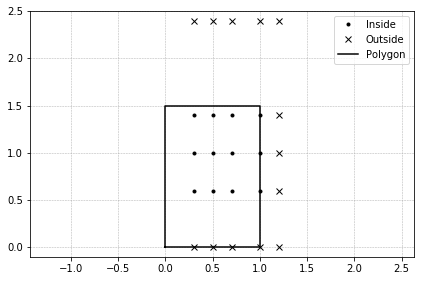

In [9]:
# polygon_example3.py

from numpy import array
from pybimstab.polygon import Polygon
coords = array([[0, 1, 1, 0.], [0, 0, 1.5, 1.5]])
x = array([0.3, 0.5, 0.7, 1.2, 1.0])
y = array([0.6, 1., 1.4, 2.4, 0])
polygon = Polygon(coordinates=coords)
polygon.isinside(x=x, y=y, meshgrid=True, want2plot=True)


array([ True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True, False,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True, False,  True,  True,  True,  True, False,  True,  True,  True], dtype=bool)

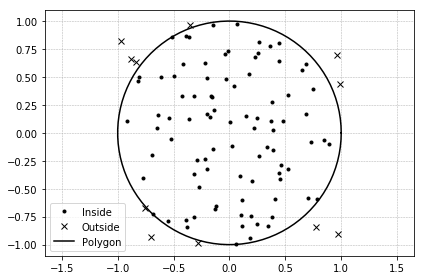

In [10]:
# polygon_example4.py

import numpy as np
from pybimstab.polygon import Polygon
xC = [np.cos(theta) for theta in np.linspace(0, 2*np.pi, 100)]
yC = [np.sin(theta) for theta in np.linspace(0, 2*np.pi, 100)]
coords = np.array([xC, yC])
np.random.seed(123)
x = np.random.uniform(-1, 1, 100)
y = np.random.uniform(-1, 1, 100)
polygon = Polygon(coordinates=coords)
polygon.isinside(x=x, y=y, meshgrid=False, want2plot=True)


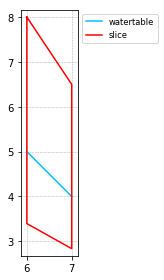

In [11]:
# slices_SliceStr_example1.py

from shapely.geometry import LineString
from pybimstab.slices import MaterialParameters, SliceStr
material = MaterialParameters(cohesion=15, frictAngle=23,
                              unitWeight=17)
terrainLS = LineString([(6, 8), (7, 6.5)])
slipSurfLS = LineString([(6, 3.395), (7, 2.837)])
watertabLS = LineString([(6, 5), (7, 4)])
slice_ = SliceStr(material, terrainLS, slipSurfLS, watertabLS,
                  bim=None)
fig = slice_.plot()


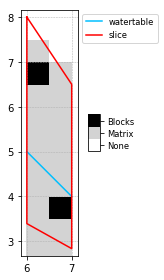

In [12]:
# slices_SliceStr_example2.py

from shapely.geometry import LineString
from pybimstab.slope import AnthropicSlope
from pybimstab.bim import BlocksInMatrix
from pybimstab.slices import MaterialParameters, SliceStr
material = MaterialParameters(cohesion=15, frictAngle=23,
                              unitWeight=17)
slope = AnthropicSlope(slopeHeight=7.5, slopeDip=[1, 1.5],
                       crownDist=5, toeDist=5, depth=2)
bim = BlocksInMatrix(slopeCoords=slope.coords, blockProp=0.2,
                     tileSize=0.5, seed=123)
terrainLS = LineString([(6, 8), (7, 6.5)])
slipSurfLS = LineString([(6, 3.395), (7, 2.837)])
watertabLS = LineString([(6, 5), (7, 4)])
slice_ = SliceStr(material, terrainLS, slipSurfLS, watertabLS,
                  bim=bim)
fig = slice_.plot()


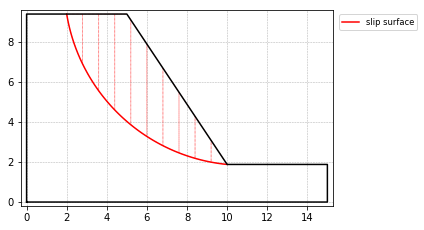

In [13]:
# slices_Slices_example1.py

from pybimstab.slope import AnthropicSlope
from pybimstab.slipsurface import CircularSurface
from pybimstab.slices import MaterialParameters, Slices
slope = AnthropicSlope(slopeHeight=7.5, slopeDip=[1, 1.5],
                       crownDist=5, toeDist=5)
surface = CircularSurface(slopeCoords=slope.coords,
                          dist1=2, dist2=10, radius=9)
material = MaterialParameters(
    cohesion=15, frictAngle=23, unitWeight=17,
    blocksUnitWeight=21, wtUnitWeight=9.8)
slices = Slices(
    material=material, slipSurfCoords=surface.coords,
    slopeCoords=slope.coords, numSlices=10,
    watertabCoords=None, bim=None)
fig = slices.plot()


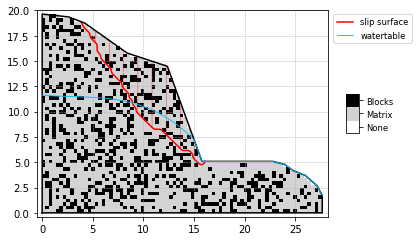

In [14]:
# slices_Slices_example2.py

from numpy import array
from pybimstab.slope import NaturalSlope
from pybimstab.watertable import WaterTable
from pybimstab.bim import BlocksInMatrix
from pybimstab.slipsurface import CircularSurface, TortuousSurface
from pybimstab.slices import MaterialParameters, Slices
terrainCoords = array(
    [[-2.49, 0.1, 1.7, 3.89, 5.9, 8.12, 9.87, 13.29, 20.29,
      21.43, 22.28, 23.48, 24.65, 25.17],
     [18.16, 17.88, 17.28, 15.73, 14.31, 13.58, 13, 3.61, 3.61,
      3.32, 2.71, 2.23, 1.21, 0.25]])
slope = NaturalSlope(terrainCoords)
bim = BlocksInMatrix(slopeCoords=slope.coords, blockProp=0.3,
                     tileSize=0.35, seed=123)
watertabDepths = array([[0, 5, 10, 15],
                        [8, 7, 3, 0]])
watertable = WaterTable(slopeCoords=slope.coords,
                        watertabDepths=watertabDepths,
                        smoothFactor=3)
preferredPath = CircularSurface(
    slopeCoords=slope.coords, dist1=5, dist2=15.78, radius=20)
surface = TortuousSurface(
    bim, dist1=4, dist2=15.78, heuristic='euclidean',
    reverseLeft=False, reverseUp=False, smoothFactor=2,
    preferredPath=preferredPath.coords, prefPathFact=2)
material = MaterialParameters(
    cohesion=15, frictAngle=23, unitWeight=17,
    blocksUnitWeight=21, wtUnitWeight=9.8)
slices = Slices(
    material=material, slipSurfCoords=surface.coords,
    slopeCoords=slope.coords, numSlices=10,
    watertabCoords=watertable.coords, bim=bim)
fig = slices.plot()


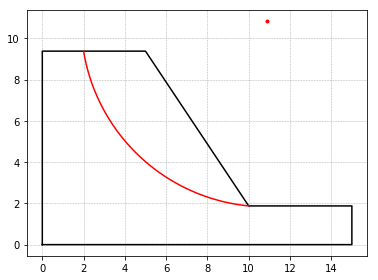

In [15]:
# slipsurface_CircularSurface_example1.py

from pybimstab.slope import AnthropicSlope
from pybimstab.slipsurface import CircularSurface
slope = AnthropicSlope(slopeHeight=7.5, slopeDip=[1, 1.5],
                       crownDist=5, toeDist=5)
surface = CircularSurface(slopeCoords=slope.coords,
                          dist1=2, dist2=10, radius=9)
fig = surface.plot()


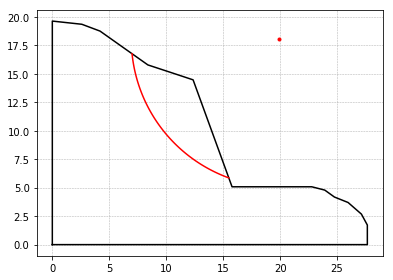

In [16]:
# slipsurface_CircularSurface_example2.py

from numpy import array
from pybimstab.slope import NaturalSlope
from pybimstab.slipsurface import CircularSurface
terrainCoords = array(
    [[-2.49, 0.1, 1.7, 3.89, 5.9, 8.12, 9.87, 13.29, 20.29,
      21.43, 22.28, 23.48, 24.65, 25.17],
     [18.16, 17.88, 17.28, 15.73, 14.31, 13.58, 13, 3.61, 3.61,
      3.32, 2.71, 2.23, 1.21, 0.25]])
slope = NaturalSlope(terrainCoords)
surface = CircularSurface(slopeCoords=slope.coords,
                          dist1=7, dist2=20, radius=13)
fig = surface.plot()


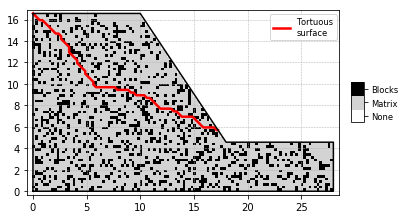

In [17]:
# slipsurface_TortuousSurface_example1.py

from pybimstab.slope import AnthropicSlope
from pybimstab.bim import BlocksInMatrix
from pybimstab.slipsurface import TortuousSurface
slope = AnthropicSlope(slopeHeight=12, slopeDip=[1, 1.5],
                       crownDist=10, toeDist=10)
bim = BlocksInMatrix(slopeCoords=slope.coords, blockProp=0.25,
                     tileSize=0.25, seed=123)

# Not allowing to turn left and up
surface = TortuousSurface(
    bim, dist1=0, dist2=17, heuristic='manhattan',
    reverseLeft=False, reverseUp=False, smoothFactor=0,
    preferredPath=None, prefPathFact=None)
fig = surface.plot()


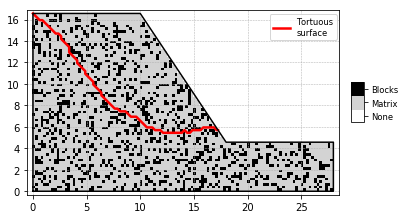

In [18]:
# slipsurface_TortuousSurface_example2.py

from pybimstab.slope import AnthropicSlope
from pybimstab.bim import BlocksInMatrix
from pybimstab.slipsurface import TortuousSurface
slope = AnthropicSlope(slopeHeight=12, slopeDip=[1, 1.5],
                       crownDist=10, toeDist=10)
bim = BlocksInMatrix(slopeCoords=slope.coords, blockProp=0.25,
                     tileSize=0.25, seed=123)

# Allowing to turn left and up
slope = AnthropicSlope(slopeHeight=12, slopeDip=[1, 1.5],
                       crownDist=10, toeDist=10)
bim = BlocksInMatrix(slopeCoords=slope.coords, blockProp=0.25,
                     tileSize=0.25, seed=123)

# Allowing to turn left and up (manhattan heusitic function)
surface = TortuousSurface(
    bim, dist1=0, dist2=17, heuristic='manhattan',
    reverseLeft=True, reverseUp=True, smoothFactor=0,
    preferredPath=None, prefPathFact=None)
fig = surface.plot()


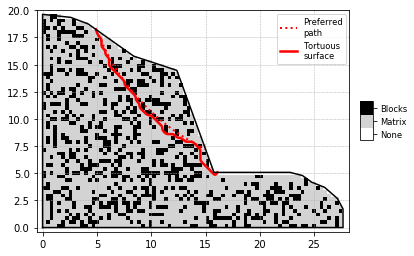

In [19]:
# slipsurface_TortuousSurface_example3.py

from numpy import array
from pybimstab.slope import NaturalSlope
from pybimstab.bim import BlocksInMatrix
from pybimstab.slipsurface import CircularSurface, TortuousSurface
terrainCoords = array(
    [[-2.49, 0.1, 1.7, 3.89, 5.9, 8.12, 9.87, 13.29, 20.29,
      21.43, 22.28, 23.48, 24.65, 25.17],
     [18.16, 17.88, 17.28, 15.73, 14.31, 13.58, 13, 3.61, 3.61,
      3.32, 2.71, 2.23, 1.21, 0.25]])
slope = NaturalSlope(terrainCoords)
bim = BlocksInMatrix(slopeCoords=slope.coords, blockProp=0.3,
                     tileSize=0.35, seed=123)
preferredPath = CircularSurface(
    slopeCoords=slope.coords, dist1=5, dist2=15, radius=20)
# With a preferred path and smoothing the surface
surface = TortuousSurface(
    bim, dist1=5, dist2=15.78, heuristic='manhattan',
    reverseLeft=False, reverseUp=False, smoothFactor=2,
    preferredPath=preferredPath.coords, prefPathFact=2)
fig = surface.plot()


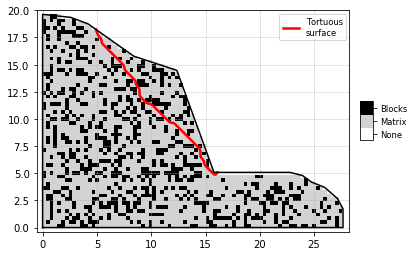

In [20]:
# slipsurface_TortuousSurface_example4.py

from numpy import array
from pybimstab.slope import NaturalSlope
from pybimstab.bim import BlocksInMatrix
from pybimstab.slipsurface import TortuousSurface
terrainCoords = array(
    [[-2.49, 0.1, 1.7, 3.89, 5.9, 8.12, 9.87, 13.29, 20.29,
      21.43, 22.28, 23.48, 24.65, 25.17],
     [18.16, 17.88, 17.28, 15.73, 14.31, 13.58, 13, 3.61, 3.61,
      3.32, 2.71, 2.23, 1.21, 0.25]])
slope = NaturalSlope(terrainCoords)
bim = BlocksInMatrix(slopeCoords=slope.coords, blockProp=0.3,
                     tileSize=0.35, seed=123)
# Without a preferred path and smoothing the surface
surface = TortuousSurface(
    bim, dist1=5, dist2=15.78, heuristic='euclidean',
    reverseLeft=False, reverseUp=False, smoothFactor=2,
    preferredPath=None)
fig = surface.plot()


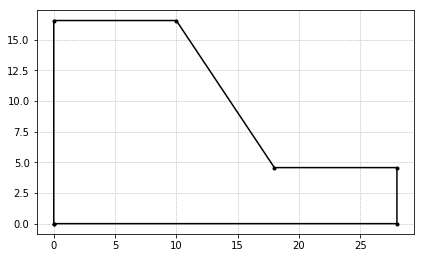

In [21]:
# slope_AnthropicSlope_example1.py

from pybimstab.slope import AnthropicSlope
slope = AnthropicSlope(slopeHeight=12, slopeDip=[1, 1.5],
                       crownDist=10, toeDist=10)
fig = slope.plot()


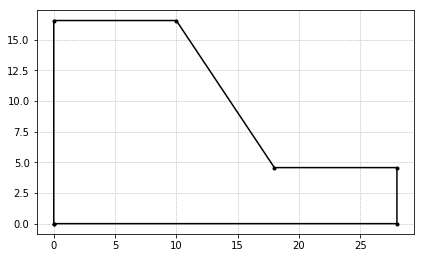

In [22]:
# slope_NaturalSlope_example1.py

from numpy import array
from pybimstab.slope import NaturalSlope
terrainCoords = array(
    [[0, 10, 18, 28], [16.571, 16.571,  4.571,  4.571]])
slope = NaturalSlope(terrainCoords)
fig = slope.plot()


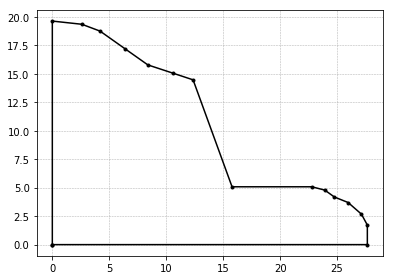

In [23]:
# slope_NaturalSlope_example2.py

from numpy import array
from pybimstab.slope import NaturalSlope
terrainCoords = array(
    [[-2.49, 0.1, 1.7, 3.89, 5.9, 8.12, 9.87, 13.29, 20.29,
      21.43, 22.28, 23.48, 24.65, 25.17],
     [18.16, 17.88, 17.28, 15.73, 14.31, 13.58, 13, 3.61, 3.61,
      3.32, 2.71, 2.23, 1.21, 0.25]])
slope = NaturalSlope(terrainCoords)
fig = slope.plot()


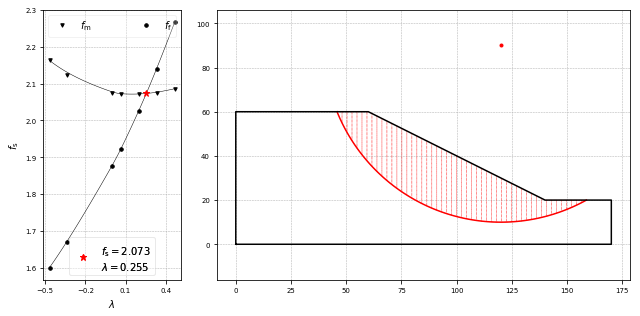

In [24]:
# slopestabl_example1.py

# Example Case 1 - Fig. 9 (Fredlund & Krahn, 1977)
from pybimstab.slope import AnthropicSlope
from pybimstab.slipsurface import CircularSurface
from pybimstab.slices import MaterialParameters, Slices
from pybimstab.slopestabl import SlopeStabl
slope = AnthropicSlope(slopeHeight=40, slopeDip=[2, 1],
                       crownDist=60, toeDist=30, depth=20)
surface = CircularSurface(slopeCoords=slope.coords,
                          dist1=45.838, dist2=158.726,
                          radius=80)
material = MaterialParameters(cohesion=600, frictAngle=20,
                              unitWeight=120,
                              wtUnitWeight=62.4)
slices = Slices(
    material=material, slipSurfCoords=surface.coords,
    slopeCoords=slope.coords, numSlices=50,
    watertabCoords=None, bim=None)
stabAnalysis = SlopeStabl(slices, seedFS=1, Kh=0,
                          interSlcFunc=1)
fig = stabAnalysis.plot()


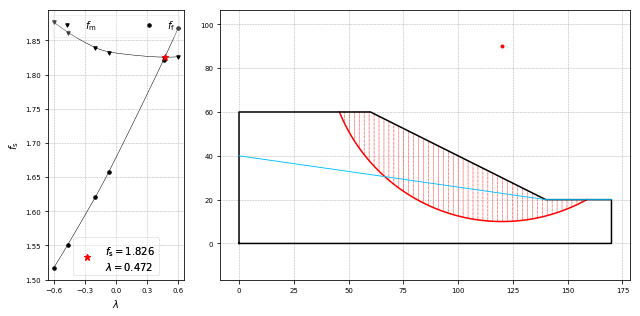

In [25]:
# slopestabl_example2.py

# Example Case 5 (Fredlund & Krahn, 1977)
from numpy import array
from pybimstab.slope import AnthropicSlope
from pybimstab.slipsurface import CircularSurface
from pybimstab.watertable import WaterTable
from pybimstab.slices import MaterialParameters, Slices
from pybimstab.slopestabl import SlopeStabl
slope = AnthropicSlope(slopeHeight=40, slopeDip=[2, 1],
                       crownDist=60, toeDist=30, depth=20)
surface = CircularSurface(slopeCoords=slope.coords,
                          dist1=45.838, dist2=158.726,
                          radius=80)
material = MaterialParameters(cohesion=600, frictAngle=20,
                              unitWeight=120,
                              wtUnitWeight=62.4)
watertable = WaterTable(slopeCoords=slope.coords,
                        watertabDepths=array([[0, 140],
                                              [20, 0]]))
slices = Slices(
    material=material, slipSurfCoords=surface.coords,
    slopeCoords=slope.coords, numSlices=50,
    watertabCoords=watertable.coords, bim=None)
stabAnalysis = SlopeStabl(slices, seedFS=1, Kh=0)
fig = stabAnalysis.plot()


In [26]:
# error

# slopestabl_example3.py

# from numpy import array
# from pybimstab.slope import NaturalSlope
# from pybimstab.watertable import WaterTable
# from pybimstab.bim import BlocksInMatrix
# from pybimstab.slipsurface import CircularSurface, TortuousSurface
# from pybimstab.slices import MaterialParameters, Slices
# from pybimstab.slopestabl import SlopeStabl
# terrainCoords = array(
#     [[-2.49, 0.1, 1.7, 3.89, 5.9, 8.12, 9.87, 13.29, 20.29,
#       21.43, 22.28, 23.48, 24.65, 25.17],
#      [18.16, 17.88, 17.28, 15.73, 14.31, 13.58, 13, 3.61, 3.61,
#       3.32, 2.71, 2.23, 1.21, 0.25]])
# slope = NaturalSlope(terrainCoords)
# bim = BlocksInMatrix(slopeCoords=slope.coords, blockProp=0.2,
#                      tileSize=0.35, seed=3210)
# watertabDepths = array([[0, 5, 10, 15],
#                         [8, 7, 3, 0]])
# watertable = WaterTable(slopeCoords=slope.coords,
#                         watertabDepths=watertabDepths,
#                         smoothFactor=3)
# preferredPath = CircularSurface(
#     slopeCoords=slope.coords, dist1=5, dist2=15.78, radius=20)
# surface = TortuousSurface(
#     bim, dist1=4, dist2=15.78, heuristic='euclidean',
#     reverseLeft=False, reverseUp=False, smoothFactor=2,
#     preferredPath=preferredPath.coords, prefPathFact=2)
# material = MaterialParameters(
#     cohesion=15, frictAngle=23, unitWeight=17,
#     blocksUnitWeight=21, wtUnitWeight=9.8)
# slices = Slices(
#     material=material, slipSurfCoords=surface.coords,
#     slopeCoords=slope.coords, numSlices=10,
#     watertabCoords=watertable.coords, bim=bim)
# stabAnalysis = SlopeStabl(slices, seedFS=1, Kh=0)
# fig = stabAnalysis.plot()


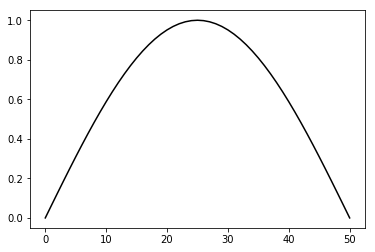

In [27]:
# slopestabl_interSlcFunct_example.py

import matplotlib.pyplot as plt
from pybimstab.slope import AnthropicSlope
from pybimstab.slipsurface import CircularSurface
from pybimstab.slices import MaterialParameters, Slices
from pybimstab.slopestabl import SlopeStabl
slope = AnthropicSlope(slopeHeight=40, slopeDip=[2, 1],
                       crownDist=60, toeDist=30, depth=20)
surface = CircularSurface(slopeCoords=slope.coords,
                          dist1=45.838, dist2=158.726,
                          radius=80)
material = MaterialParameters(cohesion=600, frictAngle=20,
                              unitWeight=120,
                              wtUnitWeight=62.4)
slices = Slices(
    material=material, slipSurfCoords=surface.coords,
    slopeCoords=slope.coords, numSlices=50)
stabAnalysis = SlopeStabl(slices, seedFS=1, Kh=0)
interslcForceFunc = stabAnalysis.intersliceForceFunct()
plt.plot(interslcForceFunc, 'k')


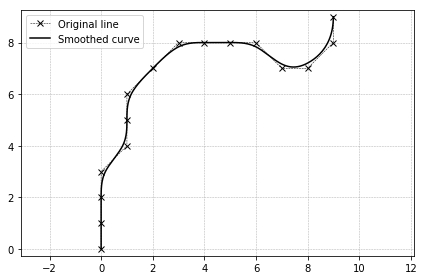

In [28]:
# smoothcurve_example1.py

from pybimstab.smoothcurve import SmoothCurve
x = [9, 9, 8, 7, 6, 5, 4, 3, 2, 1, 1, 1, 0, 0, 0, 0]
y = [9, 8, 7, 7, 8, 8, 8, 8, 7, 6, 5, 4, 3, 2, 1, 0]
curve = SmoothCurve(x, y)
fig = curve.plot()


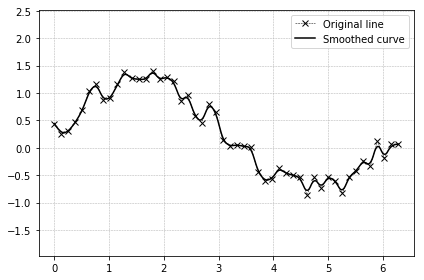

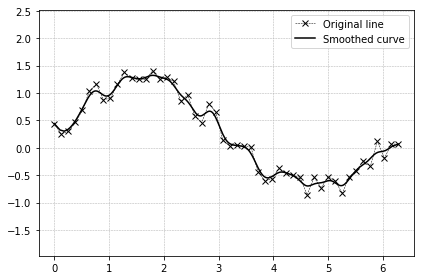

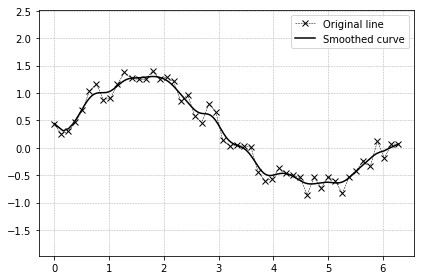

In [29]:
# smoothcurve_example2.py

import numpy as np
from pybimstab.smoothcurve import SmoothCurve
x = np.linspace(0, 2*np.pi, 50)
y = np.sin(x) + np.random.random(50) * 0.5
for k in [2, 7, 15]:
    curve = SmoothCurve(x, y, k)
    fig = curve.plot()


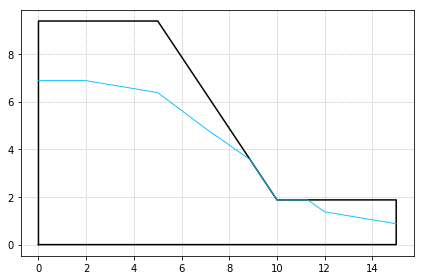

In [30]:
# watertable_example1.py

from numpy import array
from pybimstab.slope import AnthropicSlope
from pybimstab.watertable import WaterTable
slope = AnthropicSlope(slopeHeight=7.5, slopeDip=[1, 1.5],
                       crownDist=5, toeDist=5)
watertabDepths = array([[0, 2, 5, 7, 12, 15],
                       [2.5, 2.5, 3, 1.5, 0.5, 1]])
watertable = WaterTable(slopeCoords=slope.coords,
                        watertabDepths=watertabDepths,
                        smoothFactor=0)
fig = watertable.plot()


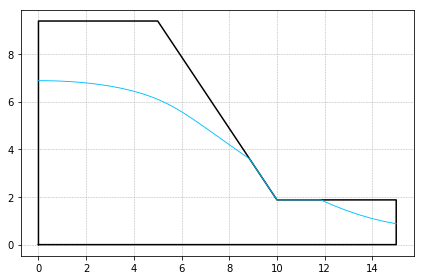

In [31]:
# watertable_example2.py

from numpy import array
from pybimstab.slope import AnthropicSlope
from pybimstab.watertable import WaterTable
slope = AnthropicSlope(slopeHeight=7.5, slopeDip=[1, 1.5],
                       crownDist=5, toeDist=5)
watertabDepths = array([[0, 2, 5, 7, 12, 15],
                       [2.5, 2.5, 3, 1.5, 0.5, 1]])
watertable = WaterTable(slopeCoords=slope.coords,
                        watertabDepths=watertabDepths,
                        smoothFactor=3)
fig = watertable.plot()


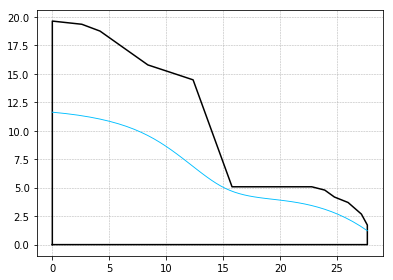

In [32]:
# watertable_example3.py

from numpy import array
from pybimstab.slope import NaturalSlope
from pybimstab.watertable import WaterTable
terrainCoords = array(
    [[-2.49, 0.1, 1.7, 3.89, 5.9, 8.12, 9.87, 13.29, 20.29,
      21.43, 22.28, 23.48, 24.65, 25.17],
     [18.16, 17.88, 17.28, 15.73, 14.31, 13.58, 13, 3.61, 3.61,
      3.32, 2.71, 2.23, 1.21, 0.25]])
slope = NaturalSlope(terrainCoords)
watertabDepths = array([[0, 5, 10, 15, 20, 25, 27.66],
                        [8, 7, 6, 3, 1, 1, 0.5]])
watertable = WaterTable(slopeCoords=slope.coords,
                        watertabDepths=watertabDepths,
                        smoothFactor=3)
fig = watertable.plot()


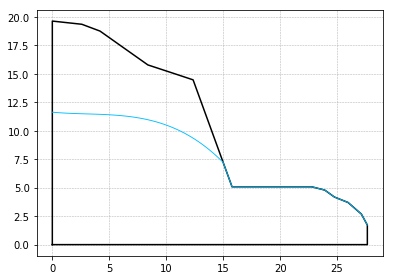

In [33]:
# watertable_example4.py

from numpy import array
from pybimstab.slope import NaturalSlope
from pybimstab.watertable import WaterTable
terrainCoords = array(
    [[-2.49, 0.1, 1.7, 3.89, 5.9, 8.12, 9.87, 13.29, 20.29,
      21.43, 22.28, 23.48, 24.65, 25.17],
     [18.16, 17.88, 17.28, 15.73, 14.31, 13.58, 13, 3.61, 3.61,
      3.32, 2.71, 2.23, 1.21, 0.25]])
slope = NaturalSlope(terrainCoords)
watertabDepths = array([[0, 5, 10, 15],
                        [8, 7, 3, 0]])
watertable = WaterTable(slopeCoords=slope.coords,
                        watertabDepths=watertabDepths,
                        smoothFactor=3)
fig = watertable.plot()
